# AIN 214 - PA4 - 2023
## Building kNN and Logistic Regression Classifiers


# THE STUDENT INFO
## Student Name: Özge Bülbül
## Student ID: 2220765008

# Dataset: We will use the Breast Cancer Wisconsin (Diagnostic) Dataset available on Kaggle for the assignment. 
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

## 1. Data Preprocessing

In this section, you will:
- Import necessary libraries
- Load the dataset
- Handle missing values and outliers
- Convert non-numeric values to numeric 
- Perform data normalization

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [223]:
path_to_dataset = 'data.csv'
df = pd.read_csv(path_to_dataset)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [224]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

There is a column named "Unnamed: 32" which is completely empty, therefore I dropped it.

In [225]:
df.drop(columns="Unnamed: 32", inplace=True)

In [226]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

I visualized the outliers with boxplots.

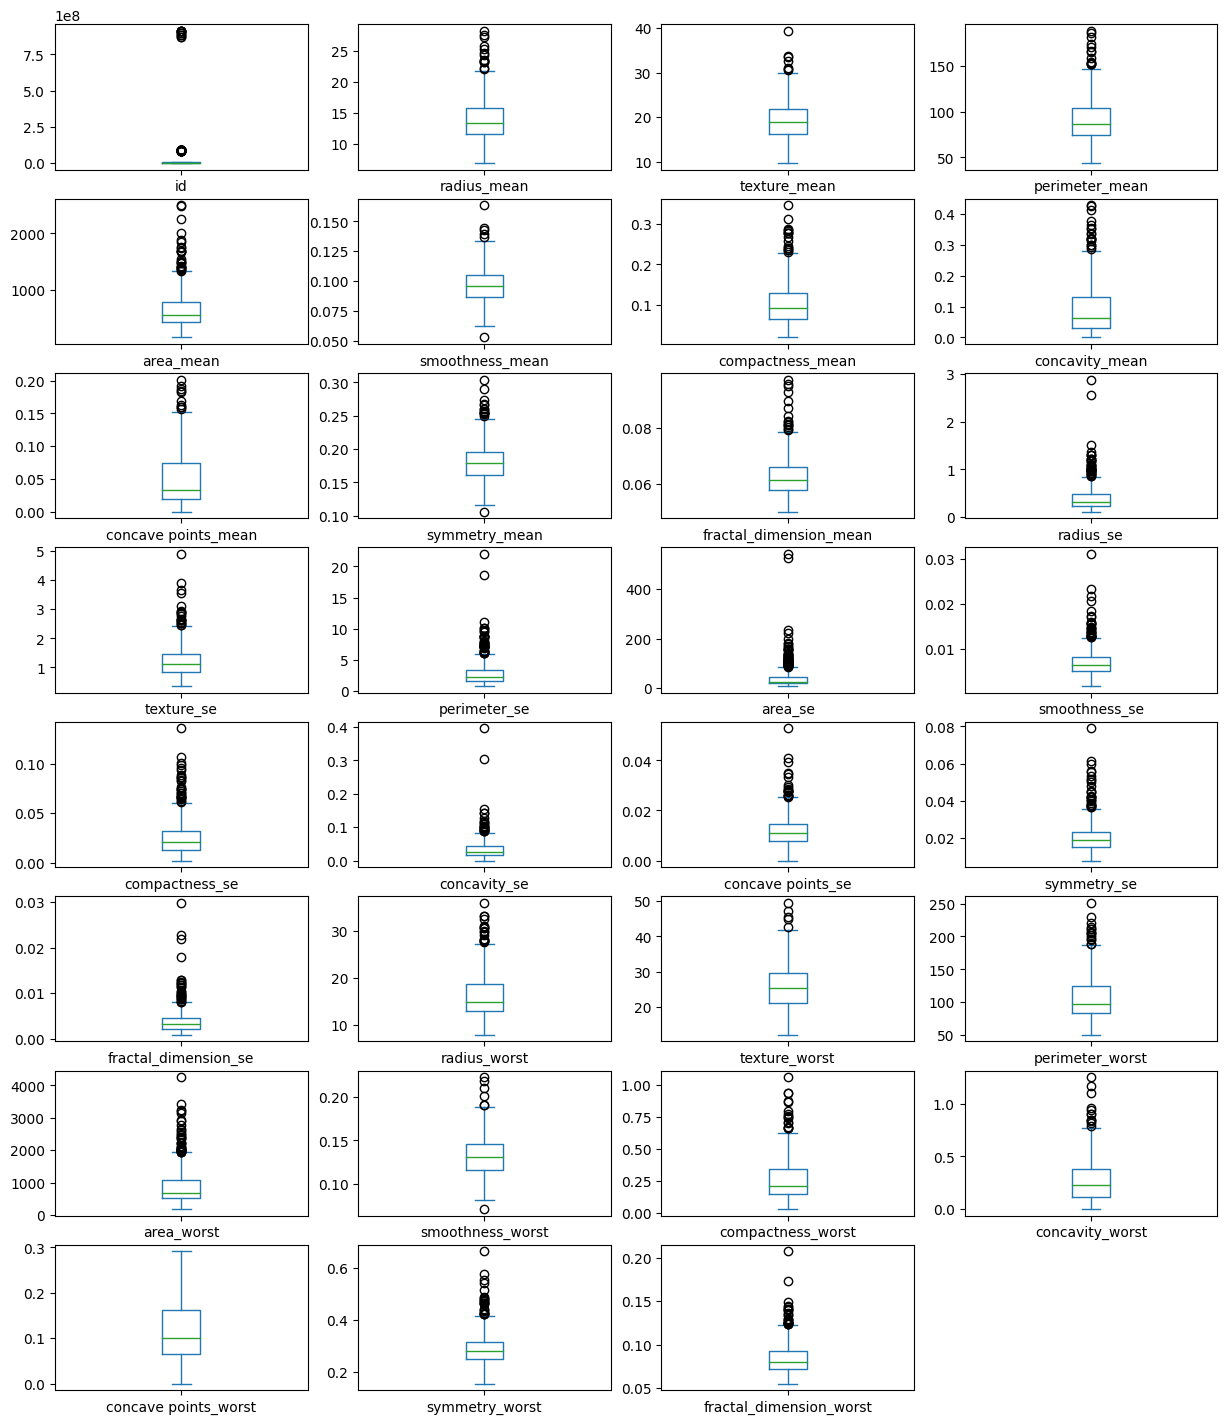

In [227]:
df.plot(kind="box",subplots=True,layout=(9,4),figsize=(15,20))
plt.show()

I defined a function that takes a df and its numerical columns, removes each columns values which are outside the interquartile range bounds. Then returns this outlier removed df.

In [228]:
def outlier_remover(df, columns):
    outlier_removed_df = df.copy()
    
    for column in columns:
        data = outlier_removed_df[column]
        Q1 = np.percentile(data, 25)
        Q3 = np.percentile(data, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = (data < lower_bound) | (data > upper_bound)
        outlier_removed_df.loc[outliers, column] = None

    return outlier_removed_df

In [229]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [230]:
is_unique = df['id'].nunique() == len(df['id'])
is_unique

True

I dropped 'id' column from numerical columns because I didn't want to detect its outliers. Above, I checked that column and saw that each value there, is unique and that checks with its name being 'id'. I don't want to drop its outliers and fill them with mean or median since that would annihilate the uniqueness.

In [231]:
numerical_columns = df.select_dtypes(include=np.number).columns
numerical_columns = numerical_columns.drop("id")
df_no_outliers = outlier_remover(df, numerical_columns)
df_no_outliers

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,NaN,NaN,0.14710,...,25.380,17.33,184.60,NaN,0.16220,NaN,0.7119,0.2654,NaN,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,NaN,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,NaN,NaN,0.24140,0.10520,...,14.910,26.50,98.87,567.7,NaN,NaN,0.6869,0.2575,NaN,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,NaN,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,NaN,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,NaN,NaN,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,NaN,NaN,0.2650,0.4087,NaN


In [232]:
df_no_outliers.isna().sum()

id                          0
diagnosis                   0
radius_mean                14
texture_mean                7
perimeter_mean             13
area_mean                  25
smoothness_mean             6
compactness_mean           16
concavity_mean             18
concave points_mean        10
symmetry_mean              15
fractal_dimension_mean     15
radius_se                  38
texture_se                 20
perimeter_se               38
area_se                    65
smoothness_se              30
compactness_se             28
concavity_se               22
concave points_se          19
symmetry_se                27
fractal_dimension_se       28
radius_worst               17
texture_worst               5
perimeter_worst            15
area_worst                 35
smoothness_worst            7
compactness_worst          16
concavity_worst            12
concave points_worst        0
symmetry_worst             23
fractal_dimension_worst    24
dtype: int64

In [233]:
df_no_outliers.dropna()
df_no_outliers

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,NaN,NaN,0.14710,...,25.380,17.33,184.60,NaN,0.16220,NaN,0.7119,0.2654,NaN,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,NaN,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,NaN,NaN,0.24140,0.10520,...,14.910,26.50,98.87,567.7,NaN,NaN,0.6869,0.2575,NaN,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,NaN,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,NaN,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,NaN,NaN,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,NaN,NaN,0.2650,0.4087,NaN


The only non-numerical column is 'diagnosis'. I analyzed the data, diagnosis contains of only M (malignant) and B (benign) values. I encoded them so that M=1 and B=0.

In [234]:
non_numerical_columns = df.select_dtypes(exclude=np.number).columns
print(non_numerical_columns)

Index(['diagnosis'], dtype='object')


In [235]:
unique_values = df['diagnosis'].unique()
print(unique_values)

['M' 'B']


In [236]:
df_no_outliers["diagnosis_encoded"] = df_no_outliers['diagnosis'].map({'M': 1, 'B': 0})

In [237]:
outlier_row_removal_df = df_no_outliers.copy()
outlier_row_removal_df.dropna(inplace=True)
outlier_row_removal_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encoded
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,1
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,1
10,845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,...,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452,1
11,84610002,M,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,...,27.28,136.50,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480,1
13,846381,M,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,...,27.66,112.00,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,924632,B,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,...,35.74,88.84,595.7,0.1227,0.1620,0.2439,0.06493,0.2372,0.07242,0
555,924934,B,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,...,34.91,69.57,357.6,0.1384,0.1710,0.2000,0.09127,0.2226,0.08283,0
558,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,...,27.27,105.90,733.5,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004,0
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,33.17,100.20,706.7,0.1241,0.2264,0.1326,0.10480,0.2250,0.08321,0


In [238]:
mean_imputated_df = df_no_outliers.copy()
numeric_columns = mean_imputated_df.select_dtypes(include='number').columns
mean_imputated_df[numeric_columns] = mean_imputated_df[numeric_columns].apply(lambda col: col.fillna(col.mean()))
mean_imputated_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encoded
0,842302,M,17.99,10.38,122.80,1001.00000,0.118400,0.099594,0.080551,0.14710,...,17.33,184.60,778.653184,0.162200,0.238973,0.711900,0.2654,0.282075,0.118900,1
1,842517,M,20.57,17.77,132.90,1326.00000,0.084740,0.078640,0.086900,0.07017,...,23.41,158.80,778.653184,0.123800,0.186600,0.241600,0.1860,0.275000,0.089020,1
2,84300903,M,19.69,21.25,130.00,1203.00000,0.109600,0.159900,0.197400,0.12790,...,25.53,152.50,1709.000000,0.144400,0.424500,0.450400,0.2430,0.361300,0.087580,1
3,84348301,M,11.42,20.38,77.58,386.10000,0.096002,0.099594,0.241400,0.10520,...,26.50,98.87,567.700000,0.131698,0.238973,0.686900,0.2575,0.282075,0.081596,1
4,84358402,M,20.29,14.34,135.10,1297.00000,0.100300,0.132800,0.198000,0.10430,...,16.67,152.20,1575.000000,0.137400,0.205000,0.400000,0.1625,0.236400,0.076780,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,608.21489,0.111000,0.115900,0.243900,0.13890,...,26.40,166.10,778.653184,0.141000,0.211300,0.410700,0.2216,0.206000,0.071150,1
565,926682,M,20.13,28.25,131.20,1261.00000,0.097800,0.103400,0.144000,0.09791,...,38.25,155.00,1731.000000,0.116600,0.192200,0.321500,0.1628,0.257200,0.066370,1
566,926954,M,16.60,28.08,108.30,858.10000,0.084550,0.102300,0.092510,0.05302,...,34.12,126.70,1124.000000,0.113900,0.309400,0.340300,0.1418,0.221800,0.078200,1
567,927241,M,20.60,29.33,140.10,1265.00000,0.117800,0.099594,0.080551,0.15200,...,39.42,184.60,1821.000000,0.165000,0.238973,0.257621,0.2650,0.408700,0.081596,1


In [239]:
median_imputated_df = df_no_outliers.copy()
numeric_columns = median_imputated_df.select_dtypes(include='number').columns
median_imputated_df[numeric_columns] = median_imputated_df[numeric_columns].apply(lambda col: col.fillna(col.median()))
median_imputated_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encoded
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.09009,0.05892,0.14710,...,17.33,184.60,655.15,0.16220,0.20890,0.7119,0.2654,0.27975,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,655.15,0.12380,0.18660,0.2416,0.1860,0.27500,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.00,0.14440,0.42450,0.4504,0.2430,0.36130,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.09579,0.09009,0.24140,0.10520,...,26.50,98.87,567.70,0.13120,0.20890,0.6869,0.2575,0.27975,0.07919,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.00,0.13740,0.20500,0.4000,0.1625,0.23640,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,537.3,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,655.15,0.14100,0.21130,0.4107,0.2216,0.20600,0.07115,1
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.00,0.11660,0.19220,0.3215,0.1628,0.25720,0.06637,1
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.00,0.11390,0.30940,0.3403,0.1418,0.22180,0.07820,1
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.09009,0.05892,0.15200,...,39.42,184.60,1821.00,0.16500,0.20890,0.2220,0.2650,0.40870,0.07919,1


After creating my 'outlier removed', 'mean imputated', 'median imputated' datasets, I removed the 'diagnosis' column from them, since we already encoded it.

In [240]:
outlier_row_removal_df.drop('diagnosis', axis=1, inplace=True)
mean_imputated_df.drop('diagnosis', axis=1, inplace=True)
median_imputated_df.drop('diagnosis', axis=1, inplace=True)

In [241]:
from sklearn.preprocessing import MinMaxScaler

In this section, I normalized all data to values between 0 and 1.

In [242]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(outlier_row_removal_df)
outlier_row_removal_df_normalized = pd.DataFrame(normalized_data, columns=outlier_row_removal_df.columns)
normalized_data = scaler.fit_transform(mean_imputated_df)
mean_imputated_df_normalized = pd.DataFrame(normalized_data, columns=mean_imputated_df.columns)
normalized_data = scaler.fit_transform(median_imputated_df)
median_imputated_df_normalized = pd.DataFrame(normalized_data, columns=median_imputated_df.columns)
outlier_row_removal_df_normalized.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encoded
0,0.000917,0.828055,0.510945,0.806404,0.762006,0.508308,0.490209,0.442829,0.587768,0.485294,...,0.548387,0.886197,0.842305,0.590802,0.387182,0.489711,0.759733,0.545842,0.436055,1.0
1,0.092668,0.494452,0.553234,0.493671,0.369231,0.892388,0.793786,0.368016,0.475377,0.796440,...,0.565217,0.518924,0.421982,0.789770,0.578969,0.346577,0.611876,0.602559,0.917292,1.0
2,0.000918,0.664193,0.673134,0.626635,0.556141,0.309384,0.258779,0.129627,0.263940,0.279412,...,0.766480,0.632727,0.571971,0.345847,0.209440,0.188818,0.392253,0.496802,0.448920,1.0
3,0.092835,0.646557,0.406965,0.636209,0.541861,0.547397,0.600700,0.391120,0.524702,0.522446,...,0.535063,0.742219,0.660304,0.547630,0.913123,0.513136,0.711758,0.856716,0.759534,1.0
4,0.000919,0.651701,0.708458,0.637273,0.543306,0.340244,0.442074,0.390491,0.426052,0.526316,...,0.548387,0.530994,0.409829,0.298921,0.274121,0.300505,0.440031,0.437527,0.117323,1.0


In [243]:
mean_imputated_df_normalized.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encoded
0,0.000915,0.745413,0.033070,0.763308,0.725159,0.787294,0.383760,0.286658,0.967763,0.969040,...,0.178009,0.983870,0.339543,0.756189,0.354335,0.921315,0.912027,0.485034,0.948040,1.0
1,0.000915,0.920103,0.397828,0.860883,1.000000,0.313143,0.283514,0.309253,0.461645,0.499226,...,0.381830,0.794706,0.339543,0.397478,0.266668,0.312670,0.639175,0.457706,0.504454,1.0
2,0.092495,0.860519,0.569595,0.832866,0.895983,0.663333,0.672280,0.702491,0.841447,0.698142,...,0.452900,0.748515,0.871839,0.589911,0.664887,0.582891,0.835052,0.791039,0.483076,1.0
3,0.092547,0.300562,0.526654,0.326442,0.205159,0.471778,0.383760,0.859075,0.692105,0.483749,...,0.485417,0.355305,0.218847,0.471253,0.354335,0.888961,0.884880,0.485034,0.394233,1.0
4,0.092559,0.901144,0.228529,0.882137,0.975476,0.532328,0.542627,0.704626,0.686184,0.496904,...,0.155883,0.746316,0.795171,0.524521,0.297467,0.517665,0.558419,0.308613,0.322743,1.0


In [244]:
median_imputated_df_normalized.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encoded
0,0.000915,0.745413,0.033070,0.763308,0.725159,0.787294,0.338293,0.209680,0.967763,0.969040,...,0.178009,0.983870,0.268881,0.756189,0.303996,0.921315,0.912027,0.476053,0.948040,1.0
1,0.000915,0.920103,0.397828,0.860883,1.000000,0.313143,0.283514,0.309253,0.461645,0.499226,...,0.381830,0.794706,0.268881,0.397478,0.266668,0.312670,0.639175,0.457706,0.504454,1.0
2,0.092495,0.860519,0.569595,0.832866,0.895983,0.663333,0.672280,0.702491,0.841447,0.698142,...,0.452900,0.748515,0.871839,0.589911,0.664887,0.582891,0.835052,0.791039,0.483076,1.0
3,0.092547,0.300562,0.526654,0.326442,0.205159,0.468798,0.338293,0.859075,0.692105,0.476780,...,0.485417,0.355305,0.218847,0.466604,0.303996,0.888961,0.884880,0.476053,0.358521,1.0
4,0.092559,0.901144,0.228529,0.882137,0.975476,0.532328,0.542627,0.704626,0.686184,0.496904,...,0.155883,0.746316,0.795171,0.524521,0.297467,0.517665,0.558419,0.308613,0.322743,1.0


## 2. Data Visualization

Visualize the data to understand it better:
- Correlation heatmap
- Distribution plots for at least 3 features


In [245]:
import seaborn as sns

In part3, I found MSE values for outlier removed, mean imputed and median imputed df's. The lowest MSE was median imputed df's, so I visualized that one.

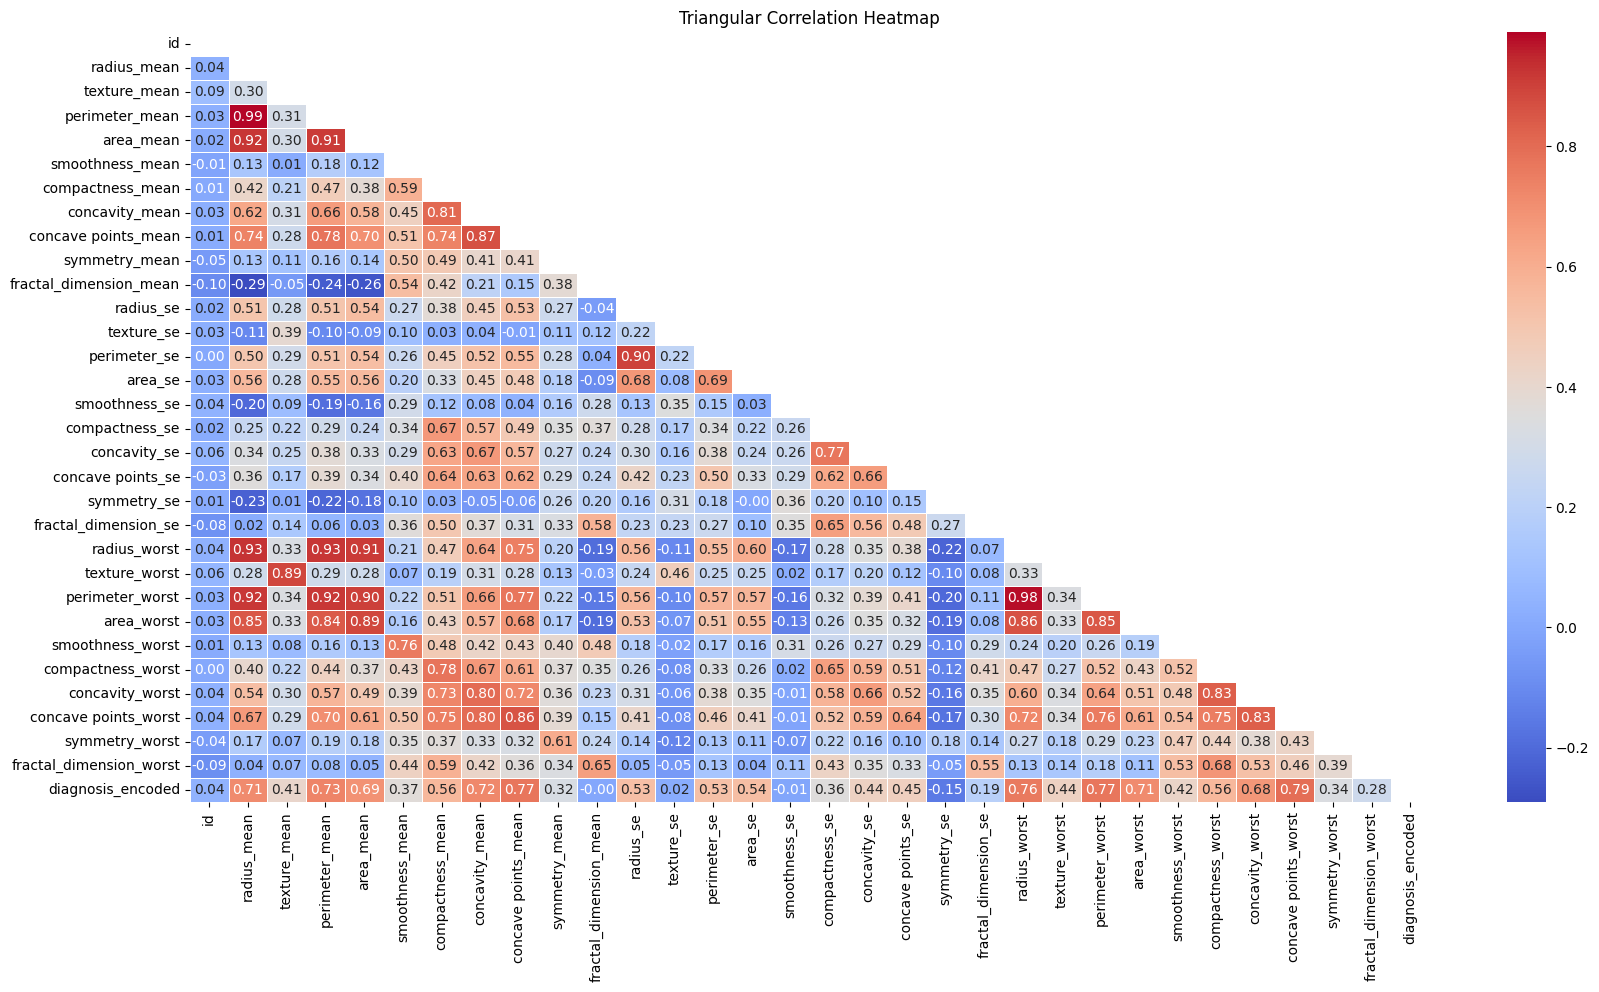

In [246]:
correlation_matrix = median_imputated_df_normalized.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Triangular Correlation Heatmap')
plt.show()

In [247]:
median_imputated_df_normalized.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encoded
0,0.000915,0.745413,0.033070,0.763308,0.725159,0.787294,0.338293,0.209680,0.967763,0.969040,...,0.178009,0.983870,0.268881,0.756189,0.303996,0.921315,0.912027,0.476053,0.948040,1.0
1,0.000915,0.920103,0.397828,0.860883,1.000000,0.313143,0.283514,0.309253,0.461645,0.499226,...,0.381830,0.794706,0.268881,0.397478,0.266668,0.312670,0.639175,0.457706,0.504454,1.0
2,0.092495,0.860519,0.569595,0.832866,0.895983,0.663333,0.672280,0.702491,0.841447,0.698142,...,0.452900,0.748515,0.871839,0.589911,0.664887,0.582891,0.835052,0.791039,0.483076,1.0
3,0.092547,0.300562,0.526654,0.326442,0.205159,0.468798,0.338293,0.859075,0.692105,0.476780,...,0.485417,0.355305,0.218847,0.466604,0.303996,0.888961,0.884880,0.476053,0.358521,1.0
4,0.092559,0.901144,0.228529,0.882137,0.975476,0.532328,0.542627,0.704626,0.686184,0.496904,...,0.155883,0.746316,0.795171,0.524521,0.297467,0.517665,0.558419,0.308613,0.322743,1.0


I chose the 'compactness_mean', 'smoothness_mean', 'area_mean', 'perimeter_mean', 'texture_mean' and 'radius_mean' columns to visualize their distribution. I used histograms with kde to show these features' frequencies.

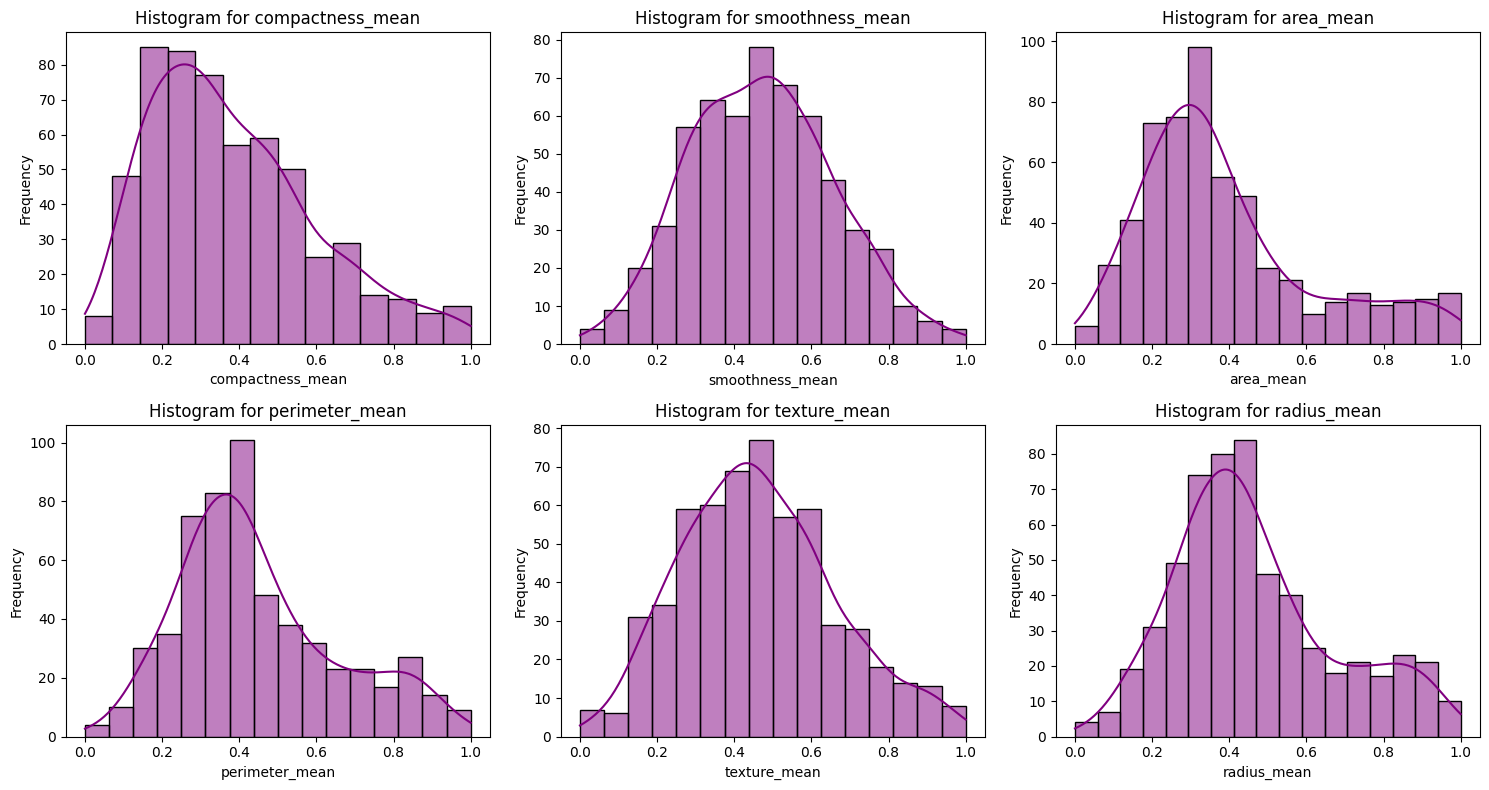

In [248]:
features = ['compactness_mean', 'smoothness_mean', 'area_mean', 'perimeter_mean', 'texture_mean', 'radius_mean']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.ravel()
for i, feature in enumerate(features):
    sns.histplot(median_imputated_df_normalized[feature], kde=True, ax=axes[i], color='purple', edgecolor='black')
    axes[i].set_title(f'Histogram for {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 3. Data Splitting

Manually split the data into training and testing sets in a 70:30 ratio:
- Shuffle and split the data
- Avoid using predefined functions like train_test_split for this task


In [249]:
outlier_row_removal_df_normalized.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encoded
0,0.000917,0.828055,0.510945,0.806404,0.762006,0.508308,0.490209,0.442829,0.587768,0.485294,...,0.548387,0.886197,0.842305,0.590802,0.387182,0.489711,0.759733,0.545842,0.436055,1.0
1,0.092668,0.494452,0.553234,0.493671,0.369231,0.892388,0.793786,0.368016,0.475377,0.796440,...,0.565217,0.518924,0.421982,0.789770,0.578969,0.346577,0.611876,0.602559,0.917292,1.0
2,0.000918,0.664193,0.673134,0.626635,0.556141,0.309384,0.258779,0.129627,0.263940,0.279412,...,0.766480,0.632727,0.571971,0.345847,0.209440,0.188818,0.392253,0.496802,0.448920,1.0
3,0.092835,0.646557,0.406965,0.636209,0.541861,0.547397,0.600700,0.391120,0.524702,0.522446,...,0.535063,0.742219,0.660304,0.547630,0.913123,0.513136,0.711758,0.856716,0.759534,1.0
4,0.000919,0.651701,0.708458,0.637273,0.543306,0.340244,0.442074,0.390491,0.426052,0.526316,...,0.548387,0.530994,0.409829,0.298921,0.274121,0.300505,0.440031,0.437527,0.117323,1.0


I defined a function that takes a df as parameter. It shuffles and splits the data with a 7:3 ratio. Then seperates it to test and train data with 'diagnosis_encoded' feature as our target variable.

In [250]:
def dataset_splitter(df):
    np.random.seed(4)
    num_rows = len(df)
    shuffled_indices = np.random.permutation(num_rows)
    num_train = int(0.7 * num_rows)
    train_indices = shuffled_indices[:num_train]
    test_indices = shuffled_indices[num_train:]
    train_set = df.iloc[train_indices]
    X_train = train_set.drop('diagnosis_encoded', axis=1)
    y_train = train_set['diagnosis_encoded']
    test_set = df.iloc[test_indices]
    X_test = test_set.drop('diagnosis_encoded', axis=1)
    y_test = test_set['diagnosis_encoded']
    return X_train, X_test, y_train, y_test

X_train_outlierRemoved, X_test_outlierRemoved, y_train_outlierRemoved, y_test_outlierRemoved = dataset_splitter(outlier_row_removal_df_normalized)
X_train_outlierRemoved

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
303,0.000988,0.432728,0.489055,0.413573,0.310837,0.456560,0.325183,0.070609,0.166005,0.537152,...,0.392063,0.433380,0.385637,0.261857,0.376818,0.226954,0.092235,0.251042,0.652452,0.339102
6,0.093111,0.672276,0.545771,0.684076,0.556991,0.862320,1.000000,0.676621,0.816521,0.771672,...,0.783524,0.682328,0.744806,0.669789,0.916471,0.674516,0.619128,0.815179,0.820043,0.903507
61,0.000937,0.382027,0.537811,0.355600,0.267913,0.278842,0.114867,0.093635,0.140588,0.442724,...,0.325316,0.730014,0.294594,0.214963,0.291412,0.094160,0.148182,0.292214,0.388486,0.207842
310,0.009987,0.811889,0.355224,0.784066,0.719507,0.426650,0.567881,0.428291,0.496743,0.428019,...,0.748647,0.350631,0.714631,0.656154,0.422806,0.402788,0.555196,0.603618,0.451599,0.414152
100,0.009550,0.350430,0.520896,0.343687,0.234849,0.734135,0.518105,0.268880,0.296902,0.639319,...,0.324113,0.497546,0.331925,0.212651,0.511966,0.268572,0.253138,0.311011,0.590618,0.377699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0.000090,0.372474,0.647264,0.371875,0.258649,0.108245,0.480910,0.312102,0.236537,0.027864,...,0.279014,0.585203,0.318562,0.179749,0.063257,0.497815,0.376860,0.429414,0.173987,0.586307
143,0.009661,0.462121,0.363682,0.433571,0.342456,0.347207,0.167159,0.139646,0.195075,0.254644,...,0.433554,0.406031,0.417536,0.310410,0.435007,0.167823,0.231138,0.380574,0.308316,0.321948
41,0.009439,0.431994,0.412438,0.419104,0.308372,0.582845,0.416147,0.152809,0.183876,0.426471,...,0.379435,0.448808,0.357531,0.259011,0.447208,0.311750,0.224020,0.311679,0.424733,0.367131
10,0.000926,0.611287,0.774129,0.623444,0.500552,0.723057,0.822230,0.661297,0.695075,0.587461,...,0.742032,0.865708,0.852573,0.642518,0.777569,1.000000,0.819852,0.795910,0.956930,0.667024


In [251]:
X_train_mean, X_test_mean, y_train_mean, y_test_mean = dataset_splitter(mean_imputated_df_normalized)
X_train_median, X_test_median, y_train_median, y_test_median = dataset_splitter(median_imputated_df_normalized)

In the section below, I did knn regression and calculated MSE's to figure out which was the best outlier handled dataframe.

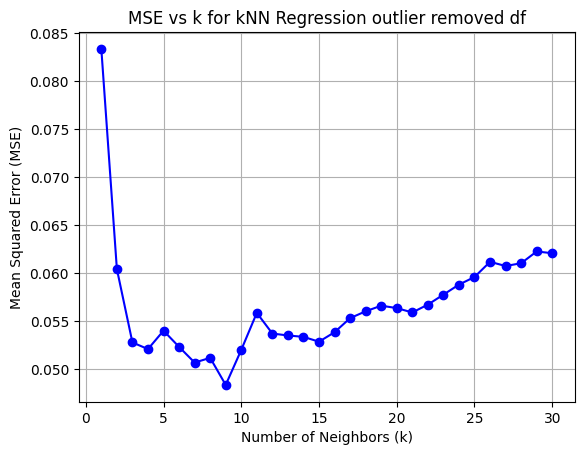

In [252]:
import sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
k_values = np.arange(1, 31)
mse_values = []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train_outlierRemoved, y_train_outlierRemoved)
    y_pred_outlierRemoved = knn_model.predict(X_test_outlierRemoved)
    mse = mean_squared_error(y_test_outlierRemoved, y_pred_outlierRemoved)
    mse_values.append(mse)

plt.plot(k_values, mse_values, marker='o', color='blue')
plt.title('MSE vs k for kNN Regression outlier removed df')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

In [253]:
optimal_k = k_values[np.argmin(mse_values)]
print(f"Optimal k for outlierRemoved: {optimal_k}")

Optimal k for outlierRemoved: 9


In [254]:
index_of_k = np.where(k_values == optimal_k)[0][0]
mse_for_k_23 = mse_values[index_of_k]
print(f"MSE for k = {optimal_k}: {mse_for_k_23}")

MSE for k = 9: 0.048353909465020585


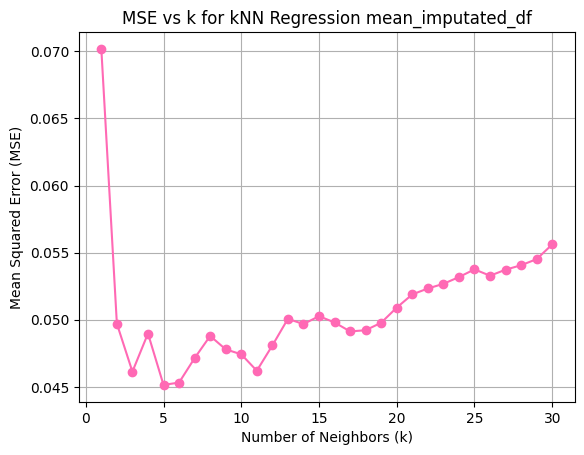

In [255]:
k_values = np.arange(1, 31)
mse_values = []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train_mean, y_train_mean)
    y_pred_mean = knn_model.predict(X_test_mean)
    mse = mean_squared_error(y_test_mean, y_pred_mean)
    mse_values.append(mse)

plt.plot(k_values, mse_values, marker='o', color='hotpink')
plt.title('MSE vs k for kNN Regression mean_imputated_df')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

In [256]:
optimal_k = k_values[np.argmin(mse_values)]
print(f"Optimal k for mean_imputated_df: {optimal_k}")

Optimal k for mean_imputated_df: 5


In [257]:
index_of_k = np.where(k_values == optimal_k)[0][0]
mse_for_k_21 = mse_values[index_of_k]
print(f"MSE for k = {optimal_k}: {mse_for_k_21}")

MSE for k = 5: 0.045146198830409365


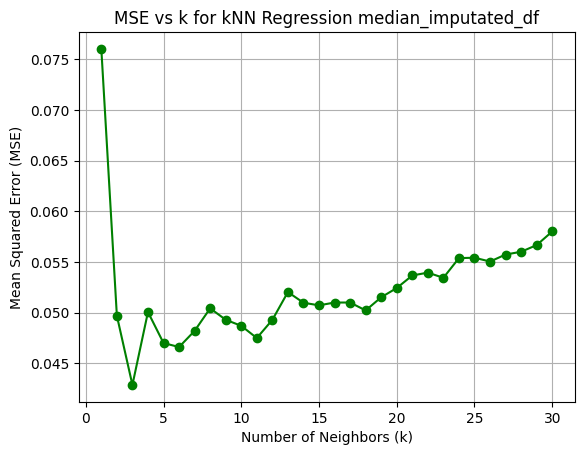

In [258]:
k_values = np.arange(1, 31)
mse_values = []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train_median, y_train_median)
    y_pred_median = knn_model.predict(X_test_median)
    mse = mean_squared_error(y_test_median, y_pred_median)
    mse_values.append(mse)

plt.plot(k_values, mse_values, marker='o', color='green')
plt.title('MSE vs k for kNN Regression median_imputated_df')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

In [259]:
optimal_k = k_values[np.argmin(mse_values)]
print(f"Optimal k for median_imputated_df: {optimal_k}")

Optimal k for median_imputated_df: 3


In [260]:
index_of_k = np.where(k_values == optimal_k)[0][0]
mse_for_k_21 = mse_values[index_of_k]
print(f"MSE for k = {optimal_k}: {mse_for_k_21}")

MSE for k = 3: 0.04288499025341131


MSE Value for outlier removed df:   0.048353909465020585<br>
MSE Value for mean imputated df:    0.045146198830409365<br>
MSE Value for median imputated df:  0.04288499025341131<br>
Lowest MSE value belongs to median imputated df, therefore i will use that one.

## 4. Model Building

In [261]:
median_imputated_df_normalized

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encoded
0,0.000915,0.745413,0.033070,0.763308,0.725159,0.787294,0.338293,0.209680,0.967763,0.969040,...,0.178009,0.983870,0.268881,0.756189,0.303996,0.921315,0.912027,0.476053,0.948040,1.0
1,0.000915,0.920103,0.397828,0.860883,1.000000,0.313143,0.283514,0.309253,0.461645,0.499226,...,0.381830,0.794706,0.268881,0.397478,0.266668,0.312670,0.639175,0.457706,0.504454,1.0
2,0.092495,0.860519,0.569595,0.832866,0.895983,0.663333,0.672280,0.702491,0.841447,0.698142,...,0.452900,0.748515,0.871839,0.589911,0.664887,0.582891,0.835052,0.791039,0.483076,1.0
3,0.092547,0.300562,0.526654,0.326442,0.205159,0.468798,0.338293,0.859075,0.692105,0.476780,...,0.485417,0.355305,0.218847,0.466604,0.303996,0.888961,0.884880,0.476053,0.358521,1.0
4,0.092559,0.901144,0.228529,0.882137,0.975476,0.532328,0.542627,0.704626,0.686184,0.496904,...,0.155883,0.746316,0.795171,0.524521,0.297467,0.517665,0.558419,0.308613,0.322743,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.001007,0.987135,0.625864,0.948797,0.333023,0.683054,0.461774,0.867972,0.913816,0.432663,...,0.482065,0.848229,0.268881,0.558150,0.308013,0.531513,0.761512,0.191194,0.239163,1.0
565,0.001007,0.890311,0.915104,0.844459,0.945032,0.497112,0.401971,0.512456,0.644145,0.452786,...,0.879316,0.766845,0.884426,0.330220,0.276042,0.416074,0.559450,0.388953,0.168201,1.0
566,0.001008,0.651297,0.906713,0.623225,0.604313,0.310466,0.396708,0.329217,0.348816,0.327399,...,0.740865,0.559352,0.537132,0.304998,0.472222,0.440404,0.487285,0.252221,0.343824,1.0
567,0.001008,0.922134,0.968411,0.930442,0.948414,0.778842,0.338293,0.209680,1.000000,0.952012,...,0.918538,0.983870,0.935919,0.782345,0.303996,0.287304,0.910653,0.974121,0.358521,1.0


### 4.1. kNN Classifier

- Build and train the kNN model
- Choose the optimal k value using Minkowski distance with at least two different values for p 

In [262]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

I defined a function that takes the test/train data and k, p values as parameter. It does knn classification with k neighbours. Parameter p is for the Minkowski formula. It determines whether manhattan distance or euclidean distance is used. After that, it does the knn prediction and returns the accuracy and prediction results. <br>
<br>
I calculated accuracy for k=3,5,7,9 and the best accuracy (best model) belongs to k=3, p=1.

In [263]:
# I dropped id column because it's a unique feature that will not help us predict the diagnosis.
median_imputated_df_normalized.drop(columns='id', inplace=True)

In [264]:
def train_knn(X_train, y_train, X_test, y_test, k, p):
    knn = KNeighborsClassifier(n_neighbors=k, p=p)
    knn.fit(X_train, y_train)
    y_prob_knn = knn.predict_proba(X_test_knn)[:, 1]
    y_pred_knn = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_knn)
    return accuracy, y_pred_knn, y_prob_knn # I'm also returning y_prob to use it while plotting precision-recall curve.

X_train_knn, X_test_knn, y_train_knn, y_test_knn = dataset_splitter(median_imputated_df_normalized)
k_values = [3, 5, 7, 9]
p_values = [1, 2]   # p=1 is for Manhattan and p=2 is for Euclidean 
best_accuracy = 0
best_k = 0
best_p = 0

for k in k_values:
    for p in p_values:
        accuracy, y_pred_knn, y_prob_knn = train_knn(X_train_knn, y_train_knn, X_test_knn, y_test_knn, k, p)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k
            best_p = p
            best_model = knn_model

print(f'Best k: {best_k}, Best p: {best_p}')


Best k: 3, Best p: 1


Optimal k value is 3 and optimal p is 1 (Manhattan distance).

### 4.2. Logistic Regression

- Build and train the Logistic Regression model

In [265]:
from sklearn.linear_model import LogisticRegression

After splitting data into train/test for target feature and other features, I applied logistic regression. Finally, I printed the accuracy, confusion matrix and logistic classification report.

In [266]:
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = dataset_splitter(median_imputated_df_normalized)
logistic_reg_model = LogisticRegression(random_state=42)
logistic_reg_model.fit(X_train_logistic, y_train_logistic)
y_pred_logistic = logistic_reg_model.predict(X_test_logistic)
logistic_accuracy = accuracy_score(y_test_logistic, y_pred_logistic)
confusionMat = confusion_matrix(y_test_logistic, y_pred_logistic)
logisticReport = classification_report(y_test_logistic, y_pred_logistic)
print(f'Accuracy: {logistic_accuracy}\n\nConfusion Matrix: \n{confusionMat}\n\nLogistic Report: \n{logisticReport}')

Accuracy: 0.9532163742690059

Confusion Matrix: 
[[100   0]
 [  8  63]]

Logistic Report: 
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96       100
         1.0       1.00      0.89      0.94        71

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.96      0.95      0.95       171



## 5. Model Evaluation

### 5.1. Confusion Matrix

Analysis of the confusion matrices for both models:
- Plot and interpret the confusion matrices
- Display accuracy, precision, recall, and F1-score for both models

In [267]:
from sklearn.metrics import precision_score, recall_score, f1_score
import itertools

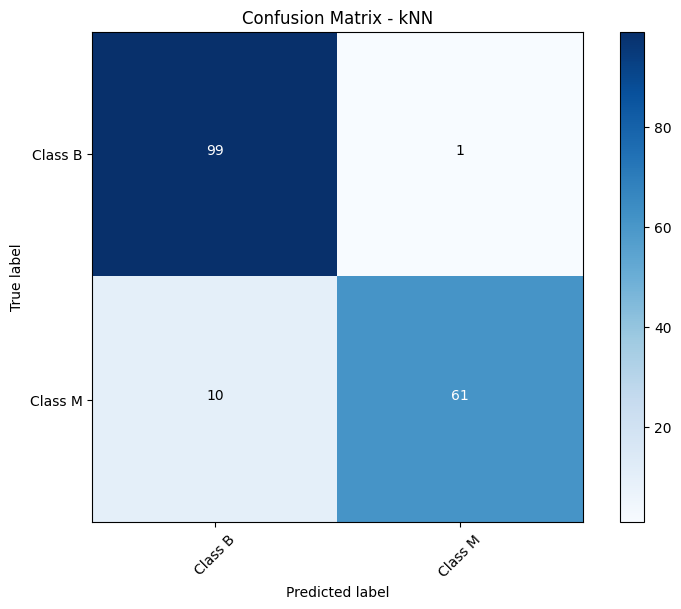

In [268]:
cm_knn = confusion_matrix(y_test_knn, y_pred_knn)
plt.figure(figsize=(8, 6))

plt.imshow(cm_knn, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - kNN')
plt.colorbar()
tick_marks = np.arange(len(['Class 0', 'Class 1']))
plt.xticks(tick_marks, ['Class B', 'Class M'], rotation=45)
plt.yticks(tick_marks, ['Class B', 'Class M'])
fmt = 'd'
thresh = cm_knn.max() / 2.
for i, j in itertools.product(range(cm_knn.shape[0]), range(cm_knn.shape[1])):
    plt.text(j, i, format(cm_knn[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm_knn[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

The prediction label shows our predicted classes, whereas true label shows the actual classes. As the class frequency increases, the colour gets darker. 61 malignant predictions were correct, only 1 malignant prediction was false and actually benign. 10 benign predictions were false. 99 benign predictions were true.<br>
True Positive(TP, Malignant): 61<br>
True Negative(TN, Benign): 99<br>
False Positive(FN): 1<br>
False Negative(FN): 10

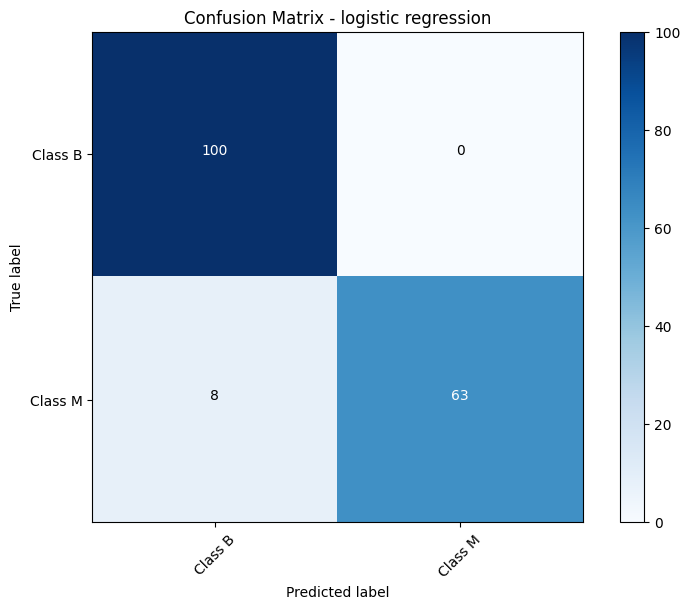

In [269]:
cm_logistic = confusion_matrix(y_test_logistic, y_pred_logistic)
plt.figure(figsize=(8, 6))
plt.imshow(cm_logistic, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - logistic regression')
plt.colorbar()
tick_marks = np.arange(len(['Class 0', 'Class 1']))
plt.xticks(tick_marks, ['Class B', 'Class M'], rotation=45)
plt.yticks(tick_marks, ['Class B', 'Class M'])
fmt = 'd'
thresh = cm_logistic.max() / 2.
for i, j in itertools.product(range(cm_logistic.shape[0]), range(cm_logistic.shape[1])):
    plt.text(j, i, format(cm_logistic[i, j], fmt), horizontalalignment="center", color="white" if cm_logistic[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

All malignant predictions were correct. 8 benign predictions were false. 100 benign predictions were true.<br>
True Positive(TP, Malignant): 63<br>
True Negative(TN, Benign): 100<br>
False Positive(FN): 0<br>
False Negative(FN): 8

In [270]:
acc = accuracy_score(y_test_knn, y_pred_knn)
precision = precision_score(y_test_knn, y_pred_knn)
recall = recall_score(y_test_knn, y_pred_knn)
f1 = f1_score(y_test_knn, y_pred_knn)
print(f'\nMetrics for knn:')
print(f'Accuracy: {acc}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')


Metrics for knn:
Accuracy: 0.935672514619883
Precision: 0.9838709677419355
Recall: 0.8591549295774648
F1-Score: 0.9172932330827067


In [271]:
acc = accuracy_score(y_test_logistic, y_pred_logistic)
precision = precision_score(y_test_logistic, y_pred_logistic)
recall = recall_score(y_test_logistic, y_pred_logistic)
f1 = f1_score(y_test_logistic, y_pred_logistic)
print(f'\nMetrics for Logistic Regression:')
print(f'Accuracy: {acc}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')


Metrics for Logistic Regression:
Accuracy: 0.9532163742690059
Precision: 1.0
Recall: 0.8873239436619719
F1-Score: 0.9402985074626865


### 5.2. Precision-Recall Curves

Evaluate the Precision-Recall curves for both models:
- Plot and analyze the curves

In [272]:
from sklearn.metrics import precision_recall_curve

In [273]:
y_prob_logistic = logistic_reg_model.predict_proba(X_test_logistic)[:, 1]

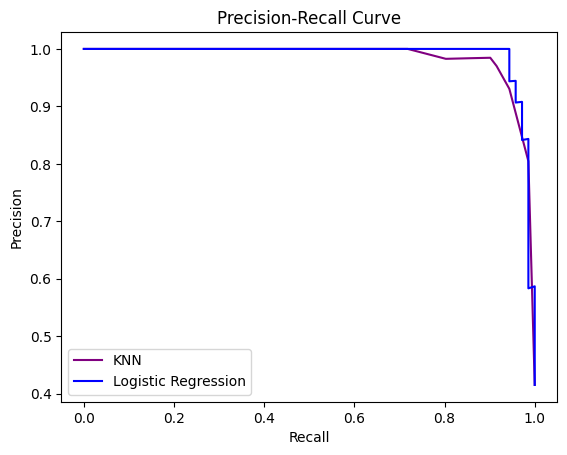

In [274]:
precision_knn, recall_knn, threshold = precision_recall_curve(y_test_knn, y_prob_knn)
precision_logistic, recall_logistic, threshold = precision_recall_curve(y_test_logistic, y_prob_logistic)

fig, ax = plt.subplots()
ax.plot(recall_knn, precision_knn, color='purple', label='KNN')
ax.plot(recall_logistic, precision_logistic, color='blue', label='Logistic Regression')
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
ax.legend()
plt.show()

In a precision-recall graph, upper-right corner gives us the ideal scenario with high precision and high recall. If one model's curve is consistently above the other, it indicates better performance in terms of both precision and recall. In our case, Logistic regression curve is almost always above knn, this makes it a better model.

### 5.3. Choose an appropriate metric to evaulate the models. Compare the models and discuss why you chose the metric.

F1 score balances precision and recall on the positive class while accuracy looks at correctly classified observations both positive and negative. Using accuracy as an evaluation metric on imbalanced datasets can be problematic because it does not appropriately account for class imbalances. In an imbalanced dataset, where one class significantly outnumbers the other, accuracy alone can be misleading and may not provide an accurate reflection of a model's performance. F1 score can be particularly useful when there is an uneven class distribution.<br> <br>
Precision and recall focus on the performance of a model with respect to a specific class. Precision is the ratio of correctly predicted positive observations to the total predicted positives, it is particularly relevant when the cost of false positives is high. Recall is the ratio of correctly predicted positive observations to all observations in the actual class, it is important when the cost of false negatives is high. For instance, since we are working on cancer diagnosis, we want to minimize false negatives to ensure no positive cases are missed. 
These metrics are particularly useful in imbalanced settings.<br><br>
All metrics on logistic regression are higher than knn, so logistic regression is likely to provide better overall performance. If I was to choose one metric for comparison, I would choose recall. Because as I stated above, recall gives us the ratio of true positives and we need that to be high. In cancer diagnosis, actually in disease diagnosis in general, not finding many false negatives is very important. It is relatively more important than others because we shouldn't diagnose any cancer patient as a healthy person. Accepting false positives in this case doesn't cause nearly as much problem as false negatives. In conclusion, with the chosen metric 'recall' being higher in logistic regression than knn, logistic regression is a better model.